# Transformada de Fourier

Sea $f(x)$ una función conocida en $N$ puntos separados uniformemente dentro del intervalo $[a, b]$, con $a = x_0$ y $b = x_0 + L$. Es decir, una función _discretizada_. La transformada discreta de Fourier (DFT) $\hat{f}$ de $f$ es el análogo discreto de la serie de Fourier de una función continua. Se obtiene con:

$$
\hat{f}(k) = \frac{1}{\sqrt{2\pi}} \sum_{n = 0}^{N - 1} f(x_n)e^{ix_nk}\Delta
$$

donde $x_n = x_0 + n\Delta$ y $\Delta = L / N$.

### 1. Código que calcula la transformada de Fourier:

In [78]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = (10, 6)

In [74]:
def trans_fourier(funcion, valores_x):
    normalizacion = np.divide(1.0, np.power(2.0 * np.pi, 0.5))
    valores_freq = valores_x 
    f_k = []
    N = len(valores_freq)
    delta = abs(valores_x[1] - valores_x[0])
    
    for i in range(N):
        terminos = []
        
        for n in range(N - 1):
            parte_exp = np.exp(-complex(0,1) * valores_x[n] * valores_freq[i])
            terminos.append(funcion[n] * parte_exp * delta)
            
        f_k.append(normalizacion * np.sum(terminos))
        
    return [valores_freq, np.array(f_k)]

### 2. Transformada de Fourier de una Gaussiana con dispersión $s$ y centrada en $x_0 = 0$

In [75]:
def fx_gauss(x, sigma, mu):
    return (math.exp(-0.5 * ((x - mu) / sigma)**2) * 1.0 / (sigma * math.sqrt(2.0 * math.pi)))

vec_gauss = np.vectorize(fx_gauss)

Pongamos $s = 2$:

In [90]:
a, b = -15.0, 15.0
N = 500
x0 = 0.0
s = 2.0

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]

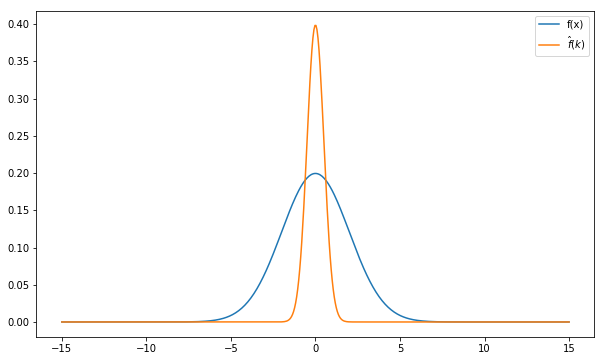

In [91]:
plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(k, trans_real, label = r'$\hat{f}(k)$')
plt.legend()

#### b. Escoge varios valores de $s$. ¿Qué pasa si $s = 1$?

Probemos con una dispersión más pequeña.

In [96]:
a, b = -15.0, 15.0
N = 500
x0 = 0.0
s = 0.7

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]

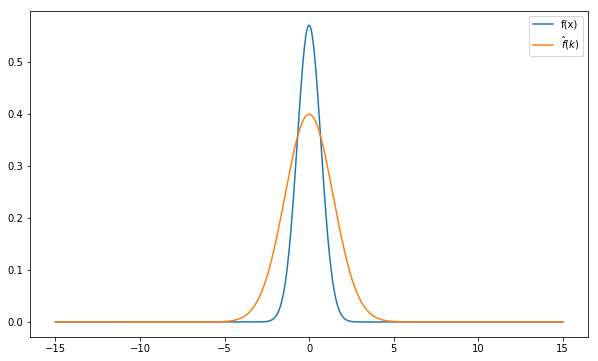

In [97]:
plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(k, trans_real, label = r'$\hat{f}(k)$')
plt.legend()

Y con una dispersión más grande.

In [99]:
a, b = -15.0, 15.0
N = 500
x0 = 0.0
s = 3.0

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]

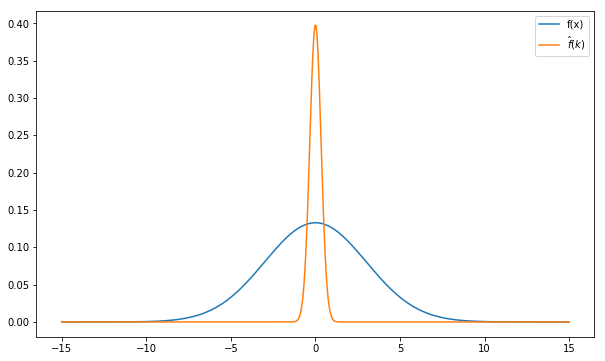

In [100]:
plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(k, trans_real, label = r'$\hat{f}(k)$')
plt.legend()

Se observa que, conforme la dispersión crece, $\hat{f}$ tiene un pico más pronunciado, pero que llega al mismo valor, mientras que $f$ se aplana y disminuye su máximo. Ambos picos coinciden en $s = 1$:

In [103]:
a, b = -15.0, 15.0
N = 500
x0 = 0.0
s = 1.0

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]

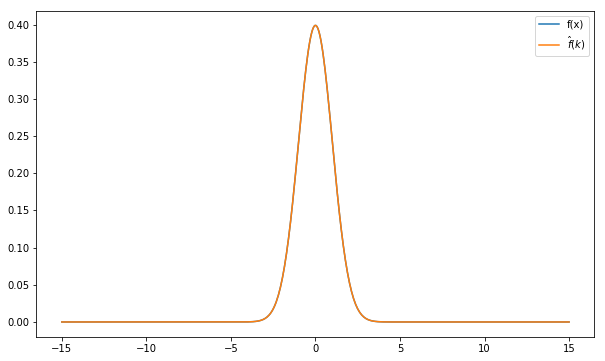

In [104]:
plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(k, trans_real, label = r'$\hat{f}(k)$')
plt.legend()

#### a. ¿Qué pasa con la tranformada si $x_0 = 1$?

In [101]:
a, b = -15.0, 15.0
N = 500
x0 = 1.0
s = 2.0

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
k, gauss_trans = trans_fourier(gaussiana, x)
trans_real = [i.real for i in gauss_trans]

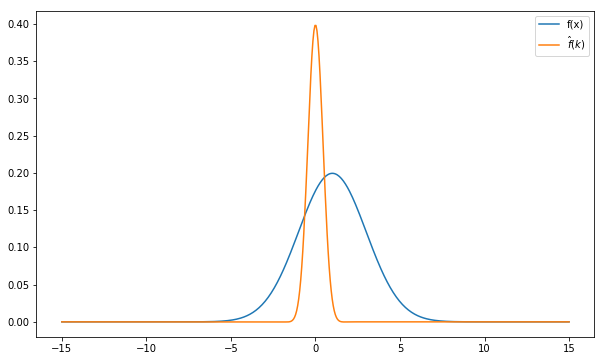

In [102]:
plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(k, trans_real, label = r'$\hat{f}(k)$')
plt.legend()

La gaussiana se desplaza, pero el pico de la transformada se queda en el mismo lugar.

#### c. Compara lo obtenido con la función FFT

El problema con la función fft de numpy es que no tengo idea de cómo graficarla, ni por qué devuelve un rango distinto de valores para k.

In [111]:
a, b = -15.0, 15.0
N = 500
x0 = 0.0
s = 2.0

x = np.linspace(a, b, N)
gaussiana = vec_gauss(x, s, x0)
gauss_trans = np.fft.fft(gaussiana, N)
trans_real = [i.real for i in gauss_trans]

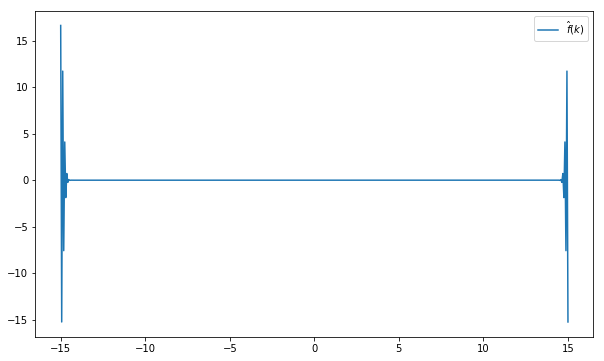

In [112]:
#plt.plot(x, gaussiana, label = 'f(x)')
plt.plot(x, trans_real, label = r'$\hat{f}(k)$')
plt.legend()